# Our datasets benchmark

In [1]:
import pandas as pd
import os 
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/enzymetk/')
from steps.sequence_search_blast import BLAST
from steps.save_step import Save

swissprot = pd.read_csv('swissprot.tsv', sep='\t') 
def annotate_residue_from_uniprot(df):
    # Organise the active sites of these guys to be better
    active_sites = []
    active_site_residue_counts = []
    x = 0
    for act_site in df['Active site'].values:
        sites = []
        if isinstance(act_site, str):
            act_site = act_site.replace(" ", '')
            for act in act_site.split('ACT_SITE'):
                try:
                    sites.append(int(act.split(';')[0].replace(" ", '')) - 1) # Need to subtract 1 to make it fit with the fact that python is 0 encoded lol
                except:
                    x = 1
        if len(sites) != 0:
            active_sites.append('|'.join([str(s) for s in sites]))
            active_site_residue_counts.append(len(sites))
        else:
            active_sites.append('None')
            active_site_residue_counts.append(0)
    df['Residue'] = active_sites
    df['active_site_residue_counts'] = active_site_residue_counts
    return df
    
swissprot = annotate_residue_from_uniprot(swissprot)
swissprot = swissprot[swissprot['active_site_residue_counts'] > 0]
training_ids = set(pd.read_csv('Structural_ID_benchmark_training_set.txt', header=None)[0].values)
test_ids = set(pd.read_csv('0.3_Structural_ID_benchmark.txt', header=None)[0].values)
test_df = swissprot[swissprot['Entry'].isin(test_ids)]
training_df = swissprot[swissprot['Entry'].isin(training_ids)]


In [2]:
test_df.to_csv('swissprot_test_set.csv', index=False)

In [3]:
ec3 = []
for e in swissprot['EC number'].values:
    e3 = False
    if isinstance(e, str):
        for ec in e.split(';'):
            if e[:4] == '3.1.':
                e3 = True
    ec3.append(e3)
swissprot['esterase'] = ec3
swissprot['esterase'].value_counts()
swissprot[swissprot['esterase'] == True].to_csv('esterase_swissprot.csv', index=False)

In [4]:

# Remove from SwissProt
# Now we're going to save this as a fasta file 
fasta_label = f'swissprot_with_active_site_seqs_SquidlyBenchmark.fasta'
with open(fasta_label, 'w+') as fout:
    for entry, seq in training_df[['Entry', 'Sequence']].values:
        if entry not in test_ids:
            fout.write(f'>{entry}\n{seq}\n')
        else:
            # Just making double sure no contamination
            print(f"{entry} in training set?")
# Do blast on this dataset 
# This should be where you downloaded the data from zotero, there is a folder in there called AS_inference
# This contains the models and the data needed to run the tool
id_col = 'Entry'
seq_col = 'Sequence'
test_df << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'blast/Squidly_BLAST.pkl'))

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: swissprot_with_active_site_seqs_SquidlyBenchmark.fasta
Opening the database file...  [0.001s]
Loading sequences...  [0.008s]
Masking sequences...  [0.027s]
Writing sequences...  [0.001s]
Hashing sequences...  [0s]
Loading sequences...  [0s]
Writing trailer...  [0s]
Closing the input file...  [0s]
Closing the database file...  [0.002s]

Database sequences  5357
  Database letters  2224264
     Database hash  d963bdcfc7da93f07581dee9ae3e9a65
        Total time  0.042000s


['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpaiz_3wef/8HVFMCrNgY_db', '-q', '/tmp/tmpaiz_3wef/8HVFMCrNgY_query.fasta', '-o', '/tmp/tmpaiz_3wef/8HVFMCrNgY_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpaiz_3wef/8HVFMCrNgY_db -q /tmp/tmpaiz_3wef/8HVFMCrNgY_query.fasta -o /tmp/tmpaiz_3wef/8HVFMCrNgY_matches.tsv	
--------------------------------------------------------------------------------


diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpaiz_3wef
#Target sequences to report alignments for: 25
Opening the database...  [0.002s]
Database: /tmp/tmpaiz_3wef/8HVFMCrNgY_db (type: Diamond database, sequences: 5357, letters: 2224264)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Loading query sequences...  [0s]
Masking queries...  [0.022s]
Algorithm: Double-indexed
Building query histograms...  [0.098s]
Seeking in database...  [0s]
Loading reference sequences...  [0.002s]
Masking reference...  [0.024s]
Initializing temporary storage...  [0.001s]
Building reference histograms...  [0.102s]
Allocatin

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpaiz_3wef
#Target sequences to report alignments for: 25
Opening the database...  [0.002s]
Database: /tmp/tmpaiz_3wef/8HVFMCrNgY_db (type: Diamond database, sequences: 5357, letters: 2224264)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

,query,target,sequence identity,length,mismatch,gapopen,query start,query end,target start,target end,e-value,bitscore
0,A0A2D0TC04,O14638,64.6,826,283,7,10,829,53,875,0.000000e+00,1054.0
1,A0A2D0TC04,P97675,63.0,830,299,6,1,825,45,871,0.000000e+00,1053.0
2,A0A2D0TC04,P22413,53.5,826,367,10,8,825,105,921,1.290000e-298,843.0
3,A0A2D0TC04,P06802,49.1,827,401,11,8,825,87,902,1.320000e-280,796.0
4,A0A2D0TC04,Q64610,45.8,853,407,10,10,829,57,887,7.310000e-254,728.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,Q9I2A8,P09110,43.7,391,203,5,3,387,37,416,2.400000e-82,256.0
2224,Q9I2A8,O53871,38.6,415,216,7,2,392,3,402,1.480000e-67,217.0
2225,Q9I2A8,I6XHI4,41.5,390,202,9,5,382,5,380,1.390000e-64,209.0
2226,Q9I2A8,P76503,33.6,422,242,7,4,390,15,433,9.220000e-58,192.0


In [5]:
len(set(test_ids) & set(training_ids))

0

In [6]:
len(set(test_ids))
blast_df = pd.read_pickle(f'blast/Squidly_BLAST.pkl')


In [7]:
blast_df

,query,target,sequence identity,length,mismatch,gapopen,query start,query end,target start,target end,e-value,bitscore
0,A0A2D0TC04,O14638,64.6,826,283,7,10,829,53,875,0.000000e+00,1054.0
1,A0A2D0TC04,P97675,63.0,830,299,6,1,825,45,871,0.000000e+00,1053.0
2,A0A2D0TC04,P22413,53.5,826,367,10,8,825,105,921,1.290000e-298,843.0
3,A0A2D0TC04,P06802,49.1,827,401,11,8,825,87,902,1.320000e-280,796.0
4,A0A2D0TC04,Q64610,45.8,853,407,10,10,829,57,887,7.310000e-254,728.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,Q9I2A8,P09110,43.7,391,203,5,3,387,37,416,2.400000e-82,256.0
2224,Q9I2A8,O53871,38.6,415,216,7,2,392,3,402,1.480000e-67,217.0
2225,Q9I2A8,I6XHI4,41.5,390,202,9,5,382,5,380,1.390000e-64,209.0
2226,Q9I2A8,P76503,33.6,422,242,7,4,390,15,433,9.220000e-58,192.0


In [8]:
import pandas as pd
test_ids = set(pd.read_csv('0.3_Structural_ID_benchmark.txt', header=None)[0].values)


In [9]:
test_df = swissprot[swissprot['Entry'].isin(test_ids)]


In [10]:
blast_df = pd.read_pickle(f'blast/Squidly_BLAST.pkl')
blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
blast_df.drop_duplicates('query', inplace=True)
# Then join up with all df
blast_df.set_index('query', inplace=True)
test_df.set_index('Entry', inplace=True)
test_df['From'] = test_df.index
test_df = test_df.join(blast_df, how='left')
uniprot_id_to_seq = dict(zip(swissprot.Entry, swissprot.Sequence))
for name, seq, uniprot in test_df[['From', 'Sequence', 'target']].values:
    fin = f'msa/{uniprot}_{name}.fa'
    with open(fin, 'w+') as fout:
        fout.write(f'>{uniprot}\n{uniprot_id_to_seq.get(uniprot)}\n')
        fout.write(f'>{name}\n{seq}')
    # Now run clustalomega
    os.system(f'clustalo --force -i {fin} -o {fin.replace(".fa", ".msa")}')

/tmp/ipykernel_1431510/2702140977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['From'] = test_df.index


BLAST 98 0.8824242424242424 0.8921568627450981 0.8729016786570744 417 0.8148148148148148 0.13168724279835392 0.053497942386831275 0.8569958847736625


Text(0.5, 0, 'Sequence identity')

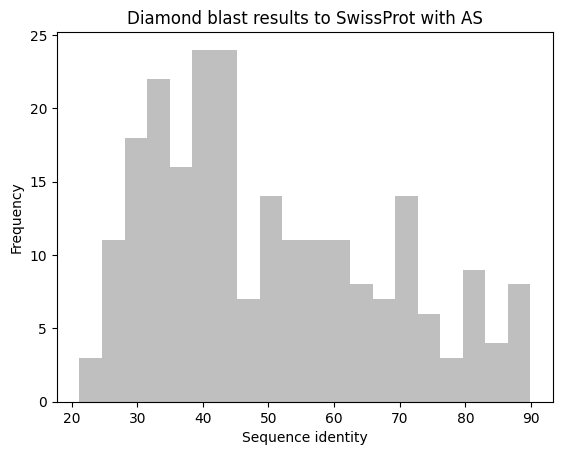

In [27]:
from Bio import AlignIO
import matplotlib.pyplot as plt
uniprot_id_to_active_site = dict(zip(swissprot['Entry'], swissprot['Residue']))
import seaborn as sns
import numpy as np

predicted_active_sites = {}
missing = 0
df = test_df.copy()
for query, uniprot in df[['From', 'target']].values:
    missing = 0
    try:
        fin = f'msa/{uniprot}_{query}.msa'
        # Read with bioseq
        # Read the alignment
        active_sites = [int(x) for x in uniprot_id_to_active_site.get(uniprot).split('|')]
        alignment = AlignIO.read(fin, 'fasta')
        # get the existing one and then calculate the position gapped
        records = {}
        for record in alignment:
            records[record.id] = record.seq
        # Now get the active site
        position_count = 0
        active_pred = []
        query_seq = records[query]
        query_count = 0
        x = 0
        for i, v in enumerate(records[uniprot]):
            if position_count in active_sites:
                if query_count < len(query_seq.replace('-', '')):
                    active_pred.append(query_count)
                if query_seq[i] != v:
                    x += 1
                    #print(query, uniprot, v, query_seq[i])
            if v != '-':
                position_count += 1
            if query_seq[i] != '-' and query_seq[i] != ' ':
                query_count += 1
    
        predicted_active_sites[query] = '|'.join([str(s) for s in active_pred])
        # Now we can just add on the
    except:
        missing += 1
df['BLAST_residues'] = [predicted_active_sites.get(label) for label in df['From'].values]
df['True_residues'] = [uniprot_id_to_active_site.get(label) for label in df['From'].values]
df.to_csv(f'blast/cataloDB.csv')
# Check the agreement:
agree, disagree, none_ = 0, 0, 0
percent_aggree = []
to_check = []
missing = 0
predictions = []
true = []
for seq_label, res_sq, res_blast, seq in df[['From', 'True_residues', 'BLAST_residues', 'Sequence']].values:
    if not res_sq:
        missing += 1
    else:
        # Calculate the F1 score
        res_sq = res_sq.split('|')
        if not res_blast:
            none_ += 1
            percent_aggree.append(0)
            res_sq = [int(i) for i in res_sq]
            for pos in range(0, len(seq)):
                predictions.append(0) # Since we had no true predictions
                if pos in res_sq:
                    true.append(1)
                else:
                    true.append(0)
        else:
            res_blast = res_blast.split('|')
            if res_sq != res_blast:
                to_check.append(seq_label)
                # Check the % agree 
                percent_aggree.append(len(set(res_sq) & set(res_blast))/max(len(res_sq), len(res_blast)))
                disagree += 1
            else:
                percent_aggree.append(1)
                agree += 1
            chosen_res_seq = [int(i) for i in res_blast]
            res_sq = [int(i) for i in res_sq]
            for pos in range(0, len(seq)):
                if pos in res_sq:
                    true.append(1)
                else:
                    true.append(0)
                if pos in chosen_res_seq:
                    predictions.append(1)
                else:
                    predictions.append(0)

precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
print('BLAST', squidly_cutoff, f1[1], precision[1], recall[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree))

plt.hist(df['sequence identity'].values, bins=20, color='grey', alpha=0.5)
plt.title('Diamond blast results to SwissProt with AS')
plt.ylabel('Frequency')
plt.xlabel('Sequence identity')

In [28]:
agree, disagree, none_

(198, 32, 13)

In [44]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Read in squidly results
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm 

df = test_df.copy()
rows = []
squidly_df = pd.read_pickle(f'squidly/squidly_as_pred_swissprot_test_set.pkl')
squidly_df.set_index('label', inplace=True)
df = df.join(squidly_df, how='left')
for squidly_cutoff in tqdm(range(0, 100, 2)):

    predictions = []
    true = []

    # Then go through and 
    # Check the agreement:
    agree, disagree, none_ = 0, 0, 0
    percent_aggree = []
    to_check = []
    labels = []
    for seq_label, res_sq, res_blast, res_squidly, seq_id, seq in df[['From', 'True_residues', 'BLAST_residues', 'Squidly_CR_Position', 'sequence identity', 'Sequence']].values:
        chosen_res_seq = res_blast
        if not res_blast or seq_id < squidly_cutoff: # Then we use res seq
            chosen_res_seq = res_squidly
            labels.append('Squidly')
        else:
            chosen_res_seq = res_blast
            labels.append('BLAST')
        if len(chosen_res_seq) > 0:
            # Calculate the F1 score
            chosen_res_seq = [int(i) for i in chosen_res_seq.split('|')]
            res_sq = [int(i) for i in res_sq.split('|')]
            for pos in range(0, len(seq)):
                if pos in res_sq:
                    true.append(1)
                else:
                    true.append(0)
                if pos in chosen_res_seq:
                    predictions.append(1)
                else:
                    predictions.append(0)
            if res_sq != chosen_res_seq:
                to_check.append(seq_label)
                # Check the % agree 
                percent_aggree.append(len(set(res_sq) & set(chosen_res_seq))/max(len(res_sq), len(chosen_res_seq)))
                disagree += 1
            else:
                percent_aggree.append(1)
                agree += 1
        else:
            none_ += 1
            percent_aggree.append(0)
            res_sq = [int(i) for i in res_sq.split('|')]
            for pos in range(0, len(seq)):
                predictions.append(0)
                if pos in res_sq:
                    true.append(1)
                else:
                    true.append(0)
    precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
    rows.append(['3B', squidly_cutoff, f1[1], precision[1], recall[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree)])


100%|██████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.56it/s]


In [48]:


squidly_df = pd.read_pickle(f'squidly/squidly_as_pred_swissprot_test_set_15B.pkl')
squidly_df.set_index('label', inplace=True)
df = df.join(squidly_df, how='left', lsuffix='_3B')
for squidly_cutoff in tqdm(range(0, 100, 2)):

    predictions = []
    true = []

    # Then go through and 
    # Check the agreement:
    agree, disagree, none_ = 0, 0, 0
    percent_aggree = []
    to_check = []
    labels = []
    for seq_label, res_sq, res_blast, res_squidly, seq_id, seq in df[['From', 'True_residues', 'BLAST_residues', 'Squidly_CR_Position', 'sequence identity', 'Sequence']].values:
        chosen_res_seq = res_blast
        if not res_blast or seq_id < squidly_cutoff: # Then we use res seq
            chosen_res_seq = res_squidly
            labels.append('Squidly')
        else:
            chosen_res_seq = res_blast
            labels.append('BLAST')
        if len(chosen_res_seq) > 0:
            # Calculate the F1 score
            chosen_res_seq = [int(i) for i in chosen_res_seq.split('|')]
            res_sq = [int(i) for i in res_sq.split('|')]
            for pos in range(0, len(seq)):
                if pos in res_sq:
                    true.append(1)
                else:
                    true.append(0)
                if pos in chosen_res_seq:
                    predictions.append(1)
                else:
                    predictions.append(0)
            if res_sq != chosen_res_seq:
                to_check.append(seq_label)
                # Check the % agree 
                percent_aggree.append(len(set(res_sq) & set(chosen_res_seq))/max(len(res_sq), len(chosen_res_seq)))
                disagree += 1
            else:
                percent_aggree.append(1)
                agree += 1
        else:
            none_ += 1
            percent_aggree.append(0)
            res_sq = [int(i) for i in res_sq.split('|')]
            for pos in range(0, len(seq)):
                predictions.append(0)
                if pos in res_sq:
                    true.append(1)
                else:
                    true.append(0)
    precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
    rows.append(['15B', squidly_cutoff, f1[1], precision[1], recall[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree)])


100%|██████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.56it/s]


In [50]:
df = pd.DataFrame(rows, columns=['Dataset', '% cutoff', 'F1', 'Precision', 'Recall', 'Support', '% fully correct', ' % with difference', ' % missing', 'Mean correct'])
df.to_csv('Ensemble_Squidly_CataloDB.csv', index=False)

In [60]:
df[df['% cutoff'] == 30]

,Dataset,% cutoff,F1,Precision,Recall,Support,% fully correct,% with difference,% missing,Mean correct
15,3B,30,0.894063,0.868778,0.920863,417,0.806584,0.181070,0.012346,0.882716
65,15B,30,0.890717,0.873272,0.908873,417,0.823045,0.168724,0.008230,0.880658


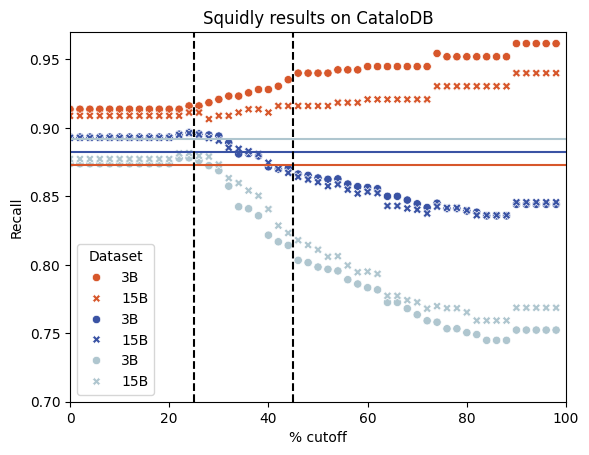

In [62]:
sns.color_palette(['#FFC440', '#D7572B', '#3A53A4', '#AFC6CF', '#895981', '#937A64'])
plt.rcParams['svg.fonttype'] = 'none'

ax = sns.scatterplot(df, x='% cutoff', y='Recall', style='Dataset', markers=['o', 'X'], color='#D7572B') #palette=['#D7572B', '#D7572B', '#3A53A4', '#AFC6CF', '#895981', '#937A64'])
ax.axhline(0.8729016786570744, c='#D7572B')
ax = sns.scatterplot(df, x='% cutoff', y='F1', ax = ax,  style='Dataset', markers=['o', 'X'], color='#3A53A4') # Blue is F1
ax.axhline(0.8824242424242424, c='#3A53A4')
ax = sns.scatterplot(df, x='% cutoff', y='Precision',  style='Dataset', markers=['o', 'X'], color='#AFC6CF') # light blue is precision
ax.axhline(0.8921568627450981, c='#AFC6CF') # Dark blue is F1
plt.ylim(0.7, 0.97)
plt.xlim(0, 100)
ax.axvline(25, c='black', linestyle = 'dashed')
ax.axvline(45, c='black', linestyle = 'dashed')
plt.title('Squidly results on CataloDB')
plt.savefig('figures/Recall_3B-15B_BLAST.svg')
plt.show()